In [2]:
print('Nirav 05/30/2020')

Nirav 05/30/2020


['week 1', 'week 2', 'week 3', 'week 4', 'week 5']
[2215, 4497, 4195, 3583, 3321]
['red', 'blue', 'brown', 'green', 'black']


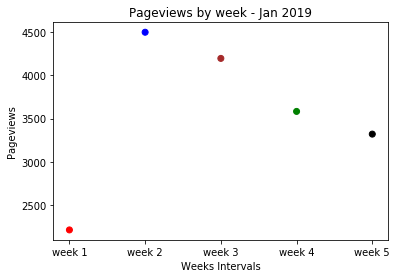

In [306]:
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt

page_view = pd.read_csv('~/Desktop/pageviews.csv')
pv = page_view
start = pv.iloc[0,0]
end = pv.iloc[-2,0]
weekly = pd.date_range(start= start, end= end, freq= 'W')
dates = pd.to_datetime(pd.Series(weekly), format = '%m/%d/%y')


first_week_start_date = datetime.datetime.strptime(start, '%m/%d/%y')
first_week_end_date = first_week_start_date + datetime.timedelta(days=4)
weekly_dates = [(first_week_start_date.date(), first_week_end_date.date())]
total_pageviews_by_week = {(first_week_start_date.date(), first_week_end_date.date()): 0}
for d in dates:
    end_date = d + datetime.timedelta(days=6)
    weekly_dates.append((d.date(), end_date.date()))
    total_pageviews_by_week[(d.date(), end_date.date())] = 0
# di = dates.apply(lambda x: x.strftime('%-m/%-d/%y')) 


for index, row in pv.iterrows():
    if isinstance(row['Day Index'], str):
        date = datetime.datetime.strptime(row['Day Index'], '%m/%d/%y').date()
        for key, value in total_pageviews_by_week.items():
            if date >= key[0] and date <= key[1]:
                total_pageviews_by_week[key] = value + int(row['Pageviews'])
#print(total_pageviews_by_week)
weeks = []
which_week = 0
for w in (list(total_pageviews_by_week.keys())):
    which_week += 1
    weeks.append('week ' + str(which_week))
dat= weeks
val= (list(total_pageviews_by_week.values()))
print(dat)
print(val)

col = {dat[0]: 'red',dat[1]: 'blue',dat[2]: 'brown',dat[3]: 'green',dat[4]: 'black'}

colo = list(col.values())
print (colo)

plt.scatter(x= dat,y= val, c= colo)
plt.xlabel('Weeks Intervals')
plt.ylabel('Pageviews')
plt.title('Pageviews by week - Jan 2019')
plt.show()